# Import

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.image as mpimg
warnings.simplefilter(action='ignore', category=FutureWarning)

In [49]:
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.loc'] = "upper left"

In [11]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

# Applying A to unit circle

In [57]:
def plot_eigenvectors(A, eigscale=None):
    eig_colors = ["g", "k"]
    eigval_A, eigvec_A = np.linalg.eig(A)
    for i in range(2):
        if not eigscale:
            eig_scale = 1
        elif "eigval" in eigscale:
            eig_scale = eigval_A[i]
        else:
            raise ValueError
            
        plt.arrow(0,0, eig_scale * eigvec_A[0,i], eig_scale * eigvec_A[1,i], color=eig_colors[i], label=f"Eigvec of A with eigval = {round(eigval_A[i],2)}", head_width=0.1,length_includes_head=True)

def unit_circle_points(n_points=1000):
    thetas = np.linspace(0, 2*np.pi, n_points)
    x = np.cos(thetas)
    y = np.sin(thetas)
    X = np.vstack((x,y))
    return X
 
    
def plot_semi_axes(A, space="unit_circle"):
    semi_axes_colors = ["C1","C3"]
    U, S, V_T = np.linalg.svd(A)
    for i in range(2):
        label = f"Semi axe with singular value = {round(S[i],2)}"
        if space == "unit_circle":
            plt.arrow(0,0, V_T.T[0,i], V_T.T[1,i], color=semi_axes_colors[i],
                      label=label, head_width=0.1,length_includes_head=True)
        elif space == "ellipsoid":
            plt.arrow(0,0, S[i]*U[0,i], S[i]*U[1,i], color=semi_axes_colors[i],
                      label=label, head_width=0.1,length_includes_head=True)
    
def application_A(A):
    # Application of A
    X = unit_circle_points(n_points=1000)
    AX = A.dot(X)
    
    

    # Plots
    ## Plot unit circle
    plt.figure(figsize=(8,6))
    plt.subplot(121)
    plt.plot(X[0,:], X[1,:])
    plot_eigenvectors(A)
    plot_semi_axes(A, space="unit_circle")
    plt.title("Unit circle")
    plt.axis("equal");
    plt.legend()
    
    plt.subplot(122)
    ## Plot Ellipsoid
    plt.plot(AX[0,:], AX[1,:])
    plot_eigenvectors(A, eigscale="eigval")
    plot_semi_axes(A, space="ellipsoid")
    plt.legend()
    plt.title("Unit circle after application of A")
    plt.axis("equal");
    plt.tight_layout()

## A is singular

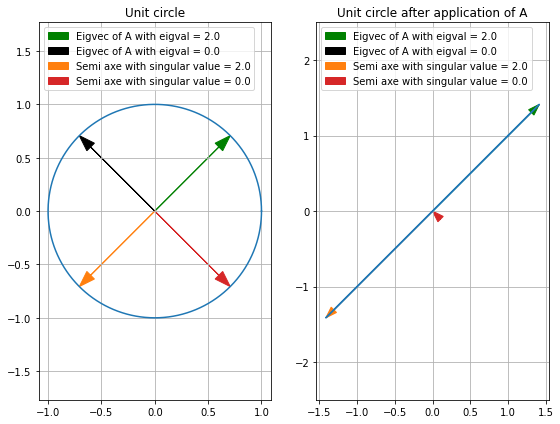

In [58]:
A = np.array([[1,1],
              [1,1]])
application_A(A)

## A is nonsingular

### A is symmetric, semidefinite positive

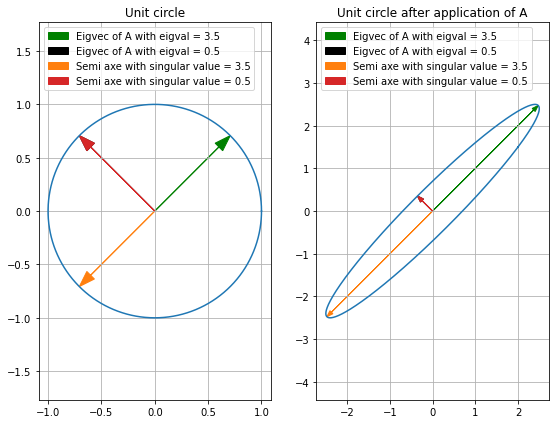

In [59]:
A = np.array([[2,1.5],
              [1.5,2]])
application_A(A)

### A is symmetric, non semidefinite positive

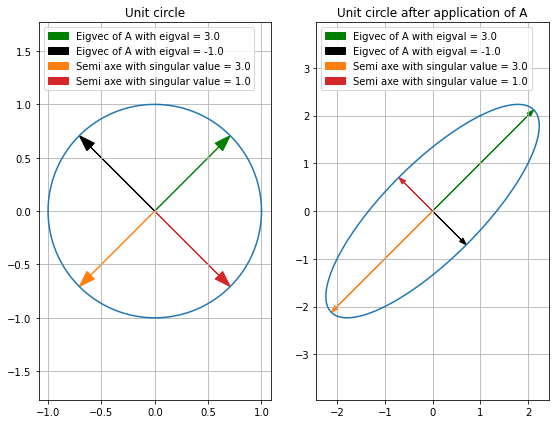

In [60]:
A = np.array([[1,2],
              [2,1]])
application_A(A)

Eigenvectors match with the semi axes of the ellipse. The radius of the semi axes are the corresponding eigenvalues.
When A is symmetric definite positive, A can be diagonalized as $A = PDP^T$. It matches with SVD decomposition

### A is non symmetric

Semi axes do not match with eigenvectors

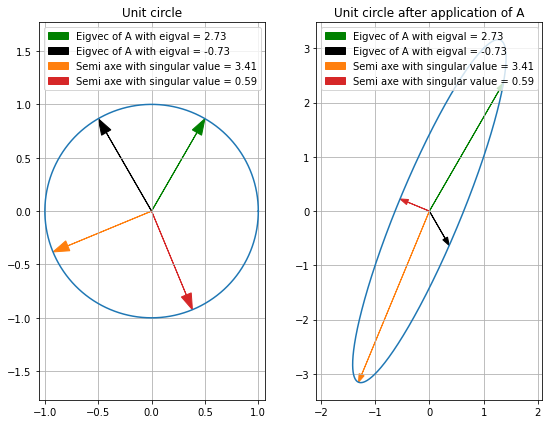

In [61]:
A = np.array([[1,1],
              [3,1]])
application_A(A)

An m × n matrix A will take a unit circle in R n and
create a hyper ellipse out of it in R m . Each semi-axis of this hyper ellipse that is not
collapsed (so has a nonzero length), corresponds to one nonzero singular value

SVD:
A[v1, v2] = [u1, u2].sigma
where v1, v2 are unitary vectors such that when A is applied to v1, v2, it gives the semi axes u1, u2 of the ellipsoid.
It is easy to see that v1 and v2 are orthogonals since u1 and u2 are orthogonal.

# SVD decomposition

In [37]:
def plot_single_vector(x='rnd_unitary'):
    if x == "rnd_unitary":
        theta = np.random.uniform(0,2*np.pi)
        x = np.array([np.cos(theta), np.sin(theta)])
        
    plt.arrow(0, 0, x[0], x[1], color="crimson", 
              #label=f"",
              head_width=0.1,length_includes_head=True)
    return x

In [38]:
A = np.array([[1,2],
              [2,1]])
def plot_svd_decomposition_steps(A,single_vector="rnd_unitary"):
    U, S, Vt = np.linalg.svd(A)
    S = np.diag(S)
    
    
    X = unit_circle_points(n_points=1000)
    VtX = Vt.dot(X)
    SVtX = S.dot(VtX)
    USVtX = U.dot(SVtX)
    
    plt.figure(figsize=(20,6))
    
    plt.subplot(141)
    plt.plot(X[0,:], X[1,:])
    single_vector = plot_single_vector(x=single_vector)
    plt.title("Unit circle")
    plt.axis("equal");
    #plt.legend()

    plt.subplot(142)
    plt.plot(VtX[0,:], VtX[1,:])
    plot_single_vector(x=Vt.dot(single_vector));
    plt.title("Rotation/Reflection Vt.X")
    plt.axis("equal");
    #plt.legend()
    
    plt.subplot(143)
    plt.plot(SVtX[0,:], SVtX[1,:])
    plot_single_vector(x=S.dot(Vt.dot(single_vector)));
    plt.title("Scaling: S.Vt.X")
    plt.axis("equal");
    #plt.legend()
    
    plt.subplot(144)
    plt.plot(USVtX[0,:], USVtX[1,:])
    plot_single_vector(x=U.dot(S.dot(Vt.dot(single_vector))));
    plt.title("Rotation/Reflection: U.S.Vt.X = AX")
    plt.axis("equal");
    #plt.legend()
    
    

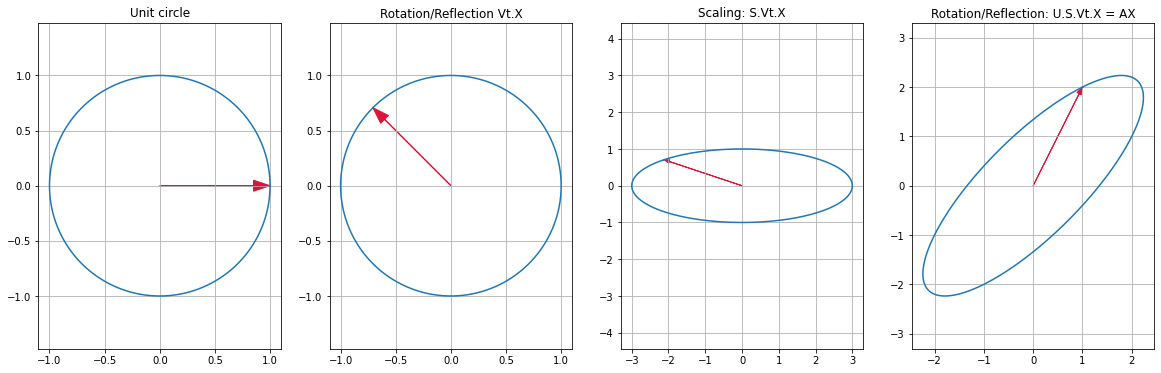

In [39]:
plot_svd_decomposition_steps(A,single_vector=np.array([1,0]))

Application of V_T is a reflection/rotation (orthogonal matrix): it preserves the unit sphere.
S is a scaling, and when A is of size mxn where m!=n, it shrinks some axes.
U is again a reflection/rotation. (orthogonal matrix)

## A 3x2 example

In [62]:
A = np.array([[1,2],
              [3,1],
              [2,1]])
X = np.array([[1],
              [0]])

In [63]:
U, S, Vt = np.linalg.svd(A)

In [64]:
Vt

array([[-0.86491009, -0.50192682],
       [-0.50192682,  0.86491009]])

In [65]:
np.diag(S)

array([[4.2499715 , 0.        ],
       [0.        , 1.39202811]])

## A 2x3 example

In [74]:
A = np.array([[1,2,3],
              [3,1,1],])
X = np.array([[1],
              [0],
              [1]])

In [105]:
U, s, Vt = np.linalg.svd(A)
S = np.hstack((np.diag(s), np.zeros((2,1))))

In [107]:
U.dot(np.diag(s).dot(Vt[:2,:].dot(X)))

array([[4.],
       [4.]])

In [108]:
A.dot(X)

array([[4],
       [4]])

In [99]:
Vt

array([[-0.59110282, -0.47933622, -0.64871739],
       [ 0.7996789 , -0.24315772, -0.54898814],
       [ 0.10540926, -0.84327404,  0.52704628]])

In [103]:
S

array([[1., 0., 0.],
       [0., 1., 0.]])

In [104]:
S.dot(Vt)

array([[-0.59110282, -0.47933622, -0.64871739],
       [ 0.7996789 , -0.24315772, -0.54898814]])

In [101]:
U

array([[-0.76950911, -0.63863584],
       [-0.63863584,  0.76950911]])

In [96]:
U.dot(S.dot(Vt))

array([[1., 2., 3.],
       [3., 1., 1.]])

In [97]:
A

array([[1, 2, 3],
       [3, 1, 1]])

# Approximating A with SVD

In [109]:
A = np.arange(25).reshape(5,5)

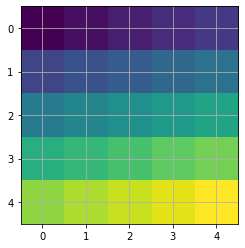

In [115]:
plt.imshow(A)

In [112]:
U,S,Vt = np.linalg.svd(A)
S = np.diag(S)
S[S<1e-1] = 0

In [118]:
A_approx = U.dot(S.dot(Vt))

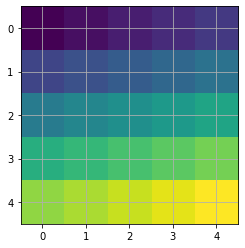

In [119]:
plt.imshow(A_approx)

# Image compression with SVD

In [122]:
img = plt.imread("./lena512.bmp")

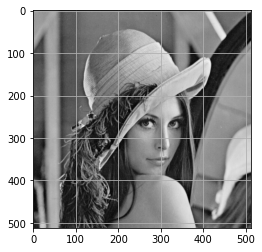

In [125]:
plt.imshow(img, cmap="gray")

In [126]:
U, S, Vt = np.linalg.svd(img)


In [144]:
def compression(img, n_singular_values_to_keep):
    U, S, Vt = np.linalg.svd(img)
    S[n_singular_values_to_keep:] = 0
    plt.imshow(U.dot(np.diag(S).dot(Vt)), cmap="gray")
    plt.title(f"Keeping {n_singular_values_to_keep}st sing val (val={np.round(S[n_singular_values_to_keep-1],1)})")

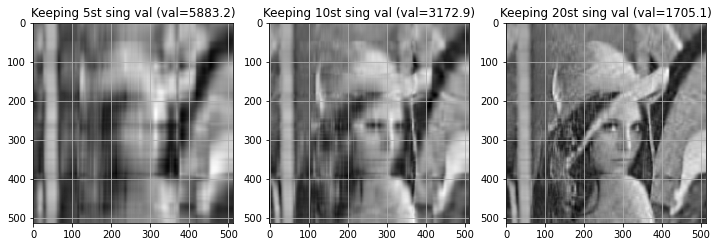

In [145]:
plt.figure(figsize=(10,6))
plt.subplot(131)
compression(img=img, n_singular_values_to_keep=5)
plt.subplot(132)
compression(img=img, n_singular_values_to_keep=10)
plt.subplot(133)
compression(img=img, n_singular_values_to_keep=20)
plt.tight_layout()

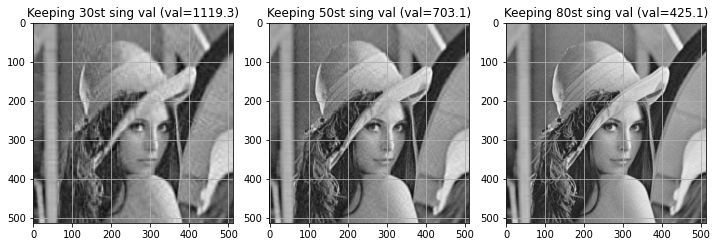

In [146]:
plt.figure(figsize=(10,6))
plt.subplot(131)
compression(img=img, n_singular_values_to_keep=30)
plt.subplot(132)
compression(img=img, n_singular_values_to_keep=50)
plt.subplot(133)
compression(img=img, n_singular_values_to_keep=80)
plt.tight_layout()